In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from matplotlib import pyplot as plt
import torchvision
import numpy as np

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
#training function

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total    

    return epoch_loss, epoch_acc
#evaluation function
def evaluate(model, test_loader, criterion, device,best_acc):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    
    #save best model
    if epoch_acc >= best_acc:
        best_acc = epoch_acc
        print("NEW HIGH!!!")
        torch.save(model.state_dict(), "best_model.pth")
    return epoch_loss, epoch_acc

In [4]:
from torchvision import models
from torchvision.models import ResNet50_Weights

weights = ResNet50_Weights.DEFAULT

model = models.resnet50(weights=weights)

preprocess = weights.transforms()

mean = preprocess.mean
std = preprocess.std

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(5),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])


test_transform = weights.transforms()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 174MB/s] 


In [5]:
n_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.fc.in_features, 2)
)

criterion = nn.CrossEntropyLoss()

model = model.to(device)

optimizer = optim.Adam(model.fc.parameters(), lr=1e-4, weight_decay=1e-4)

In [6]:
criterion = nn.CrossEntropyLoss()

In [8]:
train_dataset = datasets.ImageFolder(root=f"/kaggle/input/breast-cancer-detection/train", transform=train_transform)
test_dataset = datasets.ImageFolder(root=f"/kaggle/input/breast-cancer-detection/test", transform=test_transform)

In [9]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

In [10]:
len(train_dataset), len(test_dataset)

(2372, 336)

In [11]:
num_epochs = 10
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

In [7]:
model = model.to(device)

NameError: name 'device' is not defined

In [37]:
import torchvision.transforms as transforms

IMG_SIZE =320

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),        # Slight upsize for random crop
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [38]:
train_dataset = datasets.ImageFolder(root=f"/kaggle/input/breast-cancer-detection/train", transform=train_transform)
test_dataset = datasets.ImageFolder(root=f"/kaggle/input/breast-cancer-detection/test", transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# normal resnet with transforms

In [9]:
model = models.resnet50(pretrained=True)

# Freeze backbone (for first experiment)
for param in model.parameters():
    param.requires_grad = False

# Replace final layer
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.fc.in_features, 2)
)

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-3)
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Loss: {running_loss/len(train_loader):.4f} "
          f"Accuracy: {100*correct/total:.2f}%")

Epoch [1/10] Loss: 0.6377 Accuracy: 64.23%
Epoch [2/10] Loss: 0.5872 Accuracy: 69.24%
Epoch [3/10] Loss: 0.5554 Accuracy: 72.90%
Epoch [4/10] Loss: 0.5096 Accuracy: 75.88%
Epoch [5/10] Loss: 0.4826 Accuracy: 75.88%
Epoch [6/10] Loss: 0.4660 Accuracy: 78.18%
Epoch [7/10] Loss: 0.5115 Accuracy: 77.10%
Epoch [8/10] Loss: 0.4905 Accuracy: 77.24%
Epoch [9/10] Loss: 0.4590 Accuracy: 78.32%
Epoch [10/10] Loss: 0.4447 Accuracy: 80.08%


In [10]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100*correct/total:.2f}%")

Test Accuracy: 78.57%


# normal eff net

In [11]:
model = models.efficientnet_b4(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.classifier[1].in_features, 2)
)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-3)
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Loss: {running_loss/len(train_loader):.4f} "
          f"Accuracy: {100*correct/total:.2f}%")

Epoch [1/10] Loss: 0.6295 Accuracy: 69.38%
Epoch [2/10] Loss: 0.5434 Accuracy: 79.00%
Epoch [3/10] Loss: 0.4961 Accuracy: 82.25%
Epoch [4/10] Loss: 0.4648 Accuracy: 79.67%
Epoch [5/10] Loss: 0.4438 Accuracy: 84.28%
Epoch [6/10] Loss: 0.4255 Accuracy: 84.15%
Epoch [7/10] Loss: 0.3956 Accuracy: 85.77%
Epoch [8/10] Loss: 0.3878 Accuracy: 83.33%
Epoch [9/10] Loss: 0.3924 Accuracy: 83.88%
Epoch [10/10] Loss: 0.3626 Accuracy: 85.09%


In [12]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100*correct/total:.2f}%")

Test Accuracy: 85.71%


# fine tune resnet50 , densenet121 , efficient net b4



In [80]:
# ==========================================
# MULTI-MODEL BREAST CANCER TRAINING SCRIPT (UPDATED)
# ==========================================

import os
import random
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from torch.cuda.amp import autocast, GradScaler

# ======================
# CONFIG
# ======================
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_CLASSES = 2         # Binary classification
BATCH_SIZE = 16
IMG_SIZE = 224
EPOCHS = 20
LR = 1e-4
CHECKPOINT_DIR = "/kaggle/working/checkpoints"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# ======================
# DATASET SPLITTING
# ======================
initial_path = '/kaggle/input/datasets/ahmedmohamedabdallah/breastcancer/Data'  # Your raw dataset
directories = ['train', 'val', 'test']
subdirectories = ['Cancer', 'Negative']
props = [0.8, 0.15, 0.05]  # Train / Val / Test proportions

for subdirectory in subdirectories:
    path = os.path.join(initial_path, subdirectory)
    files = os.listdir(path)
    random.shuffle(files)
    total = len(files)
    
    train_end = int(total * props[0])
    val_end = train_end + int(total * props[1])
    
    splits = {
        'train': files[:train_end],
        'val': files[train_end:val_end],
        'test': files[val_end:]
    }
    
    for split_name, split_files in splits.items():
        new_path = os.path.join(split_name, subdirectory)
        os.makedirs(new_path, exist_ok=True)
        for file in split_files:
            shutil.copy(os.path.join(path, file), os.path.join(new_path, file))

# ======================
# TRANSFORMS
# ======================
def crop_black_borders(img):
    img_np = np.array(img)
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    coords = cv2.findNonZero(thresh)
    x, y, w, h = cv2.boundingRect(coords)
    cropped = img_np[y:y+h, x:x+w]
    return Image.fromarray(cropped)

from torchvision.datasets import ImageFolder

class CroppedImageFolder(ImageFolder):
    def __getitem__(self, index):
        path, label = self.samples[index]
        img = Image.open(path).convert("RGB")

        img = crop_black_borders(img)

        if self.transform is not None:
            img = self.transform(img)

        return img, label

train_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.05,0.05,0.05),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# ======================
# DATALOADERS
# ======================
train_dataset = CroppedImageFolder("train", transform=train_transform)
val_dataset   = CroppedImageFolder("val", transform=val_transform)
test_dataset  = CroppedImageFolder("test", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# ======================
# MODEL FACTORY
# ======================
def get_model(name="resnet50", num_classes=NUM_CLASSES):
    if name == "resnet50":
        model = models.resnet50(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.layer4.parameters():
            param.requires_grad = True
        in_features = model.fc.in_features
        model.fc = nn.Sequential(nn.Dropout(0.5), nn.Linear(in_features, num_classes))
    
    elif name == "resnet101":
        model = models.resnet101(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.layer4.parameters():
            param.requires_grad = True
        in_features = model.fc.in_features
        model.fc = nn.Sequential(nn.Dropout(0.5), nn.Linear(in_features, num_classes))
    
    elif name == "densenet121":
        model = models.densenet121(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.features.denseblock4.parameters():
            param.requires_grad = True
        in_features = model.classifier.in_features
        model.classifier = nn.Sequential(nn.Dropout(0.5), nn.Linear(in_features, num_classes))
    
    elif name == "efficientnet_b4":
        model = models.efficientnet_b4(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        for param in model.features[-1].parameters():
            param.requires_grad = True
        in_features = model.classifier[1].in_features
        model.classifier = nn.Sequential(nn.Dropout(0.5), nn.Linear(in_features, num_classes))
    
    else:
        raise ValueError(f"Unsupported model: {name}")
    
    return model.to(DEVICE)

# ======================
# TRAIN FUNCTION
# ======================
def train_model(model, train_loader, val_loader, epochs=EPOCHS, lr=LR):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    scaler = GradScaler()

    best_acc = 0

    history = {
        "train_loss": [],
        "train_acc": [],
        "val_acc": []
    }

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)

            optimizer.zero_grad()

            with autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            preds = outputs.argmax(1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        model.eval()
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(DEVICE)
                labels = labels.to(DEVICE)
                outputs = model(images)
                preds = outputs.argmax(1)
                val_total += labels.size(0)
                val_correct += (preds == labels).sum().item()

        val_acc = val_correct / val_total

        scheduler.step()

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Loss: {train_loss:.4f} "
              f"Train Acc: {100*train_acc:.2f}% "
              f"Val Acc: {100*val_acc:.2f}%")

        model_name = model.__class__.__name__
        torch.save(model.state_dict(), os.path.join(CHECKPOINT_DIR, f"{model_name}_last.pth"))

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), os.path.join(CHECKPOINT_DIR, f"{model_name}_best.pth"))
            print("🔥 Best model saved!")

    return history
# ======================
# USAGE EXAMPLE
# ======================
# model = get_model("resnet50")
# train_model(model, train_loader, val_loader)

In [82]:
model = get_model("resnet50")
resnet_history =train_model(model, train_loader,val_loader)

/tmp/ipykernel_55/1985466852.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_55/1985466852.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [1/20] Loss: 0.4154 Train Acc: 82.80% Val Acc: 92.13%
🔥 Best model saved!
Epoch [2/20] Loss: 0.2506 Train Acc: 89.88% Val Acc: 93.40%
🔥 Best model saved!
Epoch [3/20] Loss: 0.1713 Train Acc: 93.90% Val Acc: 95.96%
🔥 Best model saved!
Epoch [4/20] Loss: 0.1754 Train Acc: 93.54% Val Acc: 95.53%
Epoch [5/20] Loss: 0.1971 Train Acc: 92.44% Val Acc: 95.96%
Epoch [6/20] Loss: 0.1608 Train Acc: 92.32% Val Acc: 97.45%
🔥 Best model saved!
Epoch [7/20] Loss: 0.1750 Train Acc: 93.41% Val Acc: 97.45%
Epoch [8/20] Loss: 0.1371 Train Acc: 94.76% Val Acc: 98.09%
🔥 Best model saved!
Epoch [9/20] Loss: 0.1048 Train Acc: 95.98% Val Acc: 97.87%
Epoch [10/20] Loss: 0.0911 Train Acc: 96.22% Val Acc: 97.45%
Epoch [11/20] Loss: 0.1147 Train Acc: 95.85% Val Acc: 98.30%
🔥 Best model saved!
Epoch [12/20] Loss: 0.0845 Train Acc: 96.46% Val Acc: 98.94%
🔥 Best model saved!
Epoch [13/20] Loss: 0.1200 Train Acc: 96.71% Val Acc: 97.66%
Epoch [14/20] Loss: 0.0847 Train Acc: 96.83% Val Acc: 98.72%
Epoch [15/20] L

In [83]:
!cp "/kaggle/working/checkpoints/ResNet_best.pth" "/kaggle/working/"

In [84]:
model = get_model("efficientnet_b4")
effnet_history =train_model(model, train_loader,val_loader)

/tmp/ipykernel_55/1985466852.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_55/1985466852.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [1/20] Loss: 0.6829 Train Acc: 59.15% Val Acc: 61.91%
🔥 Best model saved!
Epoch [2/20] Loss: 0.6550 Train Acc: 69.15% Val Acc: 74.04%
🔥 Best model saved!
Epoch [3/20] Loss: 0.6327 Train Acc: 75.98% Val Acc: 80.00%
🔥 Best model saved!
Epoch [4/20] Loss: 0.6062 Train Acc: 82.44% Val Acc: 83.40%
🔥 Best model saved!
Epoch [5/20] Loss: 0.5864 Train Acc: 79.02% Val Acc: 83.83%
🔥 Best model saved!
Epoch [6/20] Loss: 0.5598 Train Acc: 83.41% Val Acc: 85.32%
🔥 Best model saved!
Epoch [7/20] Loss: 0.5417 Train Acc: 82.07% Val Acc: 86.17%
🔥 Best model saved!
Epoch [8/20] Loss: 0.5384 Train Acc: 82.32% Val Acc: 87.66%
🔥 Best model saved!
Epoch [9/20] Loss: 0.5185 Train Acc: 83.90% Val Acc: 86.17%
Epoch [10/20] Loss: 0.5036 Train Acc: 82.80% Val Acc: 86.17%
Epoch [11/20] Loss: 0.4982 Train Acc: 83.90% Val Acc: 87.02%
Epoch [12/20] Loss: 0.4836 Train Acc: 85.73% Val Acc: 87.87%
🔥 Best model saved!
Epoch [13/20] Loss: 0.4649 Train Acc: 87.20% Val Acc: 86.81%
Epoch [14/20] Loss: 0.4753 Train Acc

In [85]:
model = get_model("densenet121")
densenet_history =train_model(model, train_loader,val_loader)

/tmp/ipykernel_55/1985466852.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_55/1985466852.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [1/20] Loss: 0.5524 Train Acc: 72.93% Val Acc: 86.81%
🔥 Best model saved!
Epoch [2/20] Loss: 0.3730 Train Acc: 84.27% Val Acc: 90.21%
🔥 Best model saved!
Epoch [3/20] Loss: 0.3237 Train Acc: 87.20% Val Acc: 91.28%
🔥 Best model saved!
Epoch [4/20] Loss: 0.2867 Train Acc: 88.41% Val Acc: 90.64%
Epoch [5/20] Loss: 0.2463 Train Acc: 89.39% Val Acc: 91.49%
🔥 Best model saved!
Epoch [6/20] Loss: 0.2194 Train Acc: 91.83% Val Acc: 92.34%
🔥 Best model saved!
Epoch [7/20] Loss: 0.2121 Train Acc: 92.44% Val Acc: 94.04%
🔥 Best model saved!
Epoch [8/20] Loss: 0.2303 Train Acc: 91.59% Val Acc: 93.19%
Epoch [9/20] Loss: 0.2038 Train Acc: 91.22% Val Acc: 94.89%
🔥 Best model saved!
Epoch [10/20] Loss: 0.2009 Train Acc: 92.32% Val Acc: 97.02%
🔥 Best model saved!
Epoch [11/20] Loss: 0.1702 Train Acc: 93.29% Val Acc: 95.53%
Epoch [12/20] Loss: 0.2022 Train Acc: 91.95% Val Acc: 96.17%
Epoch [13/20] Loss: 0.1688 Train Acc: 93.05% Val Acc: 95.11%
Epoch [14/20] Loss: 0.1636 Train Acc: 94.27% Val Acc: 95

In [88]:
import matplotlib.pyplot as plt

def plot_model_comparison(resnet_hist, effnet_hist, densenet_hist):

    epochs = range(1, len(resnet_hist["train_loss"]) + 1)

    # ---------------- Accuracy ----------------
    plt.figure(figsize=(10,5))
    
    plt.plot(epochs, resnet_hist["val_acc"], label="ResNet50")
    plt.plot(epochs, effnet_hist["val_acc"], label="EfficientNet")
    plt.plot(epochs, densenet_hist["val_acc"], label="DenseNet")

    plt.title("Validation Accuracy Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()



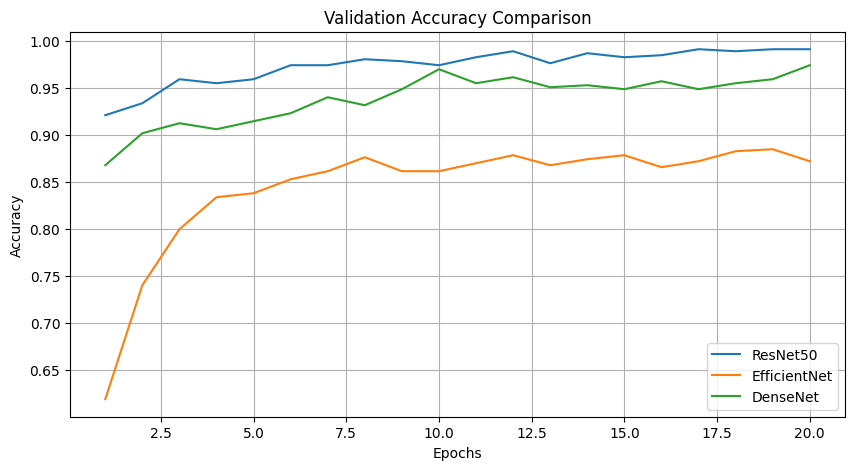

In [89]:
plot_model_comparison(resnet_history, effnet_history, densenet_history)

# Best model - ResNet50 , printing classification report and confusion matrix

In [90]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Test transforms
IMG_SIZE = 224
test_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# Load test dataset
test_dataset = ImageFolder("test", transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        outputs = model(images)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

Confusion Matrix:
[[107   5]
 [  1 106]]

Classification Report:
              precision    recall  f1-score   support

      Cancer       0.99      0.96      0.97       112
    Negative       0.95      0.99      0.97       107

    accuracy                           0.97       219
   macro avg       0.97      0.97      0.97       219
weighted avg       0.97      0.97      0.97       219



# GradCam for resnet

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


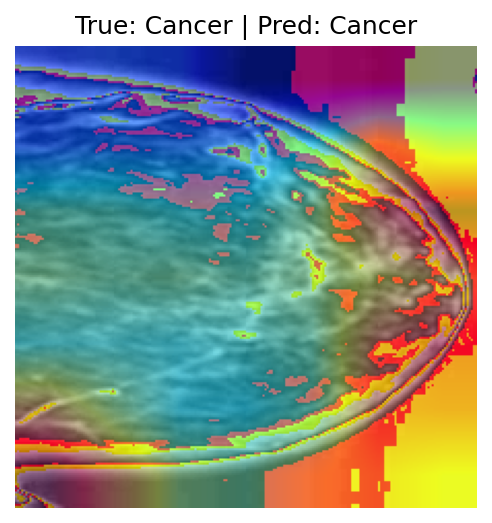

In [91]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_SIZE = 224

model = models.resnet50(pretrained=False)
in_features = model.fc.in_features
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(in_features, 2)
)
model.load_state_dict(torch.load("/kaggle/working/ResNet_best.pth", map_location=DEVICE))
model.to(DEVICE)
model.eval()

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_full_backward_hook(backward_hook)

    def generate(self, input_tensor, class_idx=None):
        output = self.model(input_tensor)
        if class_idx is None:
            class_idx = output.argmax(dim=1)

        self.model.zero_grad()
        loss = output[0, class_idx]
        loss.backward()

        weights = torch.mean(self.gradients, dim=(2, 3), keepdim=True)
        cam = torch.sum(weights * self.activations, dim=1, keepdim=True)
        cam = F.relu(cam)

        cam = F.interpolate(
            cam,
            size=(IMG_SIZE, IMG_SIZE),
            mode="bilinear",
            align_corners=False
        )

        cam = cam.squeeze()
        cam -= cam.min()
        cam /= (cam.max() + 1e-8)

        return cam.detach().cpu().numpy()

test_dataset = ImageFolder("test", transform=transform)
img, label = test_dataset[0]
input_tensor = img.unsqueeze(0).to(DEVICE)

gradcam = GradCAM(model, model.layer4[-1])
cam = gradcam.generate(input_tensor)

img_np = np.array(transforms.ToPILImage()(img)).astype(np.float32) / 255.0

heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0

superimposed = heatmap * 0.4 + img_np * 0.6
superimposed = np.clip(superimposed * 255, 0, 255).astype(np.uint8)

with torch.no_grad():
    output = model(input_tensor)
    pred = torch.argmax(output, dim=1).item()

plt.figure(figsize=(4, 4), dpi=150)
plt.imshow(superimposed)
plt.title(f"True: {test_dataset.classes[label]} | Pred: {test_dataset.classes[pred]}")
plt.axis("off")
plt.show()